### Import required libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Train Dataset : 

In [2]:
Train = pd.read_csv('Fraud Train Data.csv')

### Test Dataset : 

In [3]:
Test = pd.read_csv('Fraud Test Data.csv')

In [4]:
Train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
Test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


###  Concatenate Train and Test Dataset :

In [6]:
Dataset = pd.concat([Train,Test])
Dataset

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


### Data Pre-processing : 

In [7]:
Dataset.drop(['Unnamed: 0'],axis=1, inplace = True)

In [8]:
Dataset

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [9]:
len(Train)

1296675

In [10]:
len(Test)

555719

In [11]:
len(Train) + len(Test)

1852394

In [12]:
len(Dataset)

1852394

In [13]:
Train.shape

(1296675, 23)

In [14]:
Test.shape

(555719, 23)

In [15]:
Dataset.shape

(1852394, 22)

In [16]:
Dataset.head(50)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [17]:
Dataset.tail(50)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555669,2020-12-31 23:39:27,2305336922781618,fraud_Wilkinson LLC,personal_care,19.67,Jeffrey,Rice,M,21447 Powell Circle,Moulton,...,40.6866,-92.6833,1132,Probation officer,1961-02-14,91cd403724ee3daeb22e58275fa678f5,1388533167,39.862698,-92.007062,0
555670,2020-12-31 23:39:44,6011860238257910,"fraud_Hermiston, Pacocha and Smith",health_fitness,17.82,Lisa,Mendez,F,44259 Beth Station Suite 215,Lahoma,...,36.3850,-98.0727,1078,"Programme researcher, broadcasting/film/video",1952-07-06,ebed53c5c51d96d536ae77cfc30e3d2d,1388533184,37.137540,-99.055430,0
555671,2020-12-31 23:40:11,372520049757633,"fraud_Lesch, D'Amore and Brown",food_dining,8.27,Lori,Ramirez,F,4293 Ramirez Squares,Ranier,...,48.6031,-93.2977,136,Ceramics designer,2000-02-20,d4d8394b102dc78e8d74db5ebe801695,1388533211,48.274700,-94.001549,0
555672,2020-12-31 23:40:27,343746486082492,fraud_Botsford Ltd,shopping_pos,8.56,Jeffrey,Munoz,M,836 Stephanie Union,Cedar,...,44.8605,-85.8138,3096,"Social research officer, government",1975-10-11,ec6b5d91a169ea0b0c99a9da9e775e16,1388533227,45.549946,-84.939466,0
555673,2020-12-31 23:40:32,5152054598359927,"fraud_Bradtke, Torp and Bahringer",personal_care,131.44,Jim,Johnson,M,868 Brady Mill Apt. 837,Gretna,...,29.8872,-90.0331,55581,Biomedical scientist,1972-09-12,0168f24f76a5808fd170a758e4659c97,1388533232,30.414878,-89.636111,0
555674,2020-12-31 23:40:36,4384910379661778,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,24.43,Michelle,Russell,F,55505 Christy Via,Hawley,...,46.9777,-96.4092,4508,Naval architect,1949-04-24,136618de4eac276d0eee1a72cff018fb,1388533236,47.493570,-96.519341,0
555675,2020-12-31 23:41:51,675945690716,fraud_Denesik and Sons,shopping_pos,51.28,Ellen,Smith,F,285 George Lake,Beaver Falls,...,40.7687,-80.3592,28425,Podiatrist,2000-06-09,1942ffded1f02891eedab044d93f8257,1388533311,40.560152,-79.418273,0
555676,2020-12-31 23:42:31,2720012583106919,"fraud_Kling, Howe and Schneider",home,80.23,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,1131dd5cd8fa89d452989556c0c5f19a,1388533351,42.612618,-101.705331,0
555677,2020-12-31 23:42:51,4189814094741,fraud_Frami Group,entertainment,176.87,Jason,Farmer,M,33165 Larry Walks Suite 960,Ragland,...,33.7367,-86.1619,4159,Educational psychologist,1998-02-03,16b2c9d8aad39f5acffbc83fbe6e41d9,1388533371,33.920429,-85.450060,0
555678,2020-12-31 23:42:55,4716561796955522,fraud_Mohr Inc,shopping_pos,4.93,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,...,48.2777,-112.8456,743,Water engineer,1972-05-04,972fca17e1215d4e958968afd8488533,1388533375,48.674283,-112.545093,0


In [18]:
Dataset.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [19]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int6

In [20]:
Dataset.isnull()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
Dataset.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Visualize the Data : 

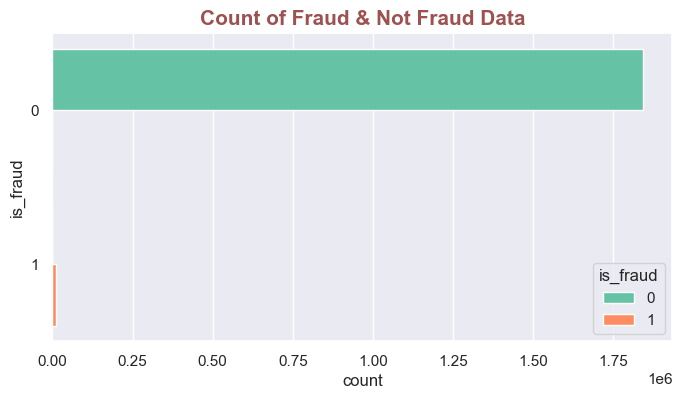

In [22]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (8,4))
sns.countplot(y = Dataset['is_fraud'],hue = Dataset['is_fraud'],saturation = 5,palette = "Set2").set_title("Count of Fraud & Not Fraud Data",
    fontdict = {'fontsize': 15,'fontweight': 'bold','color': '#9E5151'})
plt.legend(loc='lower right',title='is_fraud')

Text(0.5, 1.0, 'Count of Gender')

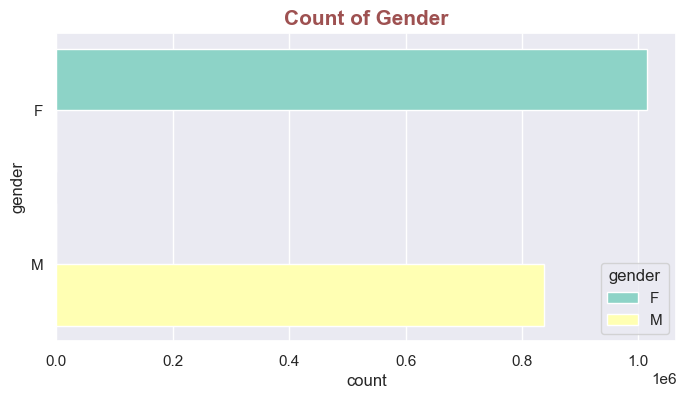

In [23]:
plt.figure(figsize = (8,4))
sns.countplot(y = Dataset['gender'],hue = Dataset['gender'],palette = "Set3",saturation=3).set_title("Count of Gender",
    fontdict = {'fontsize': 15,'fontweight': 'bold','color': '#9E5151'})

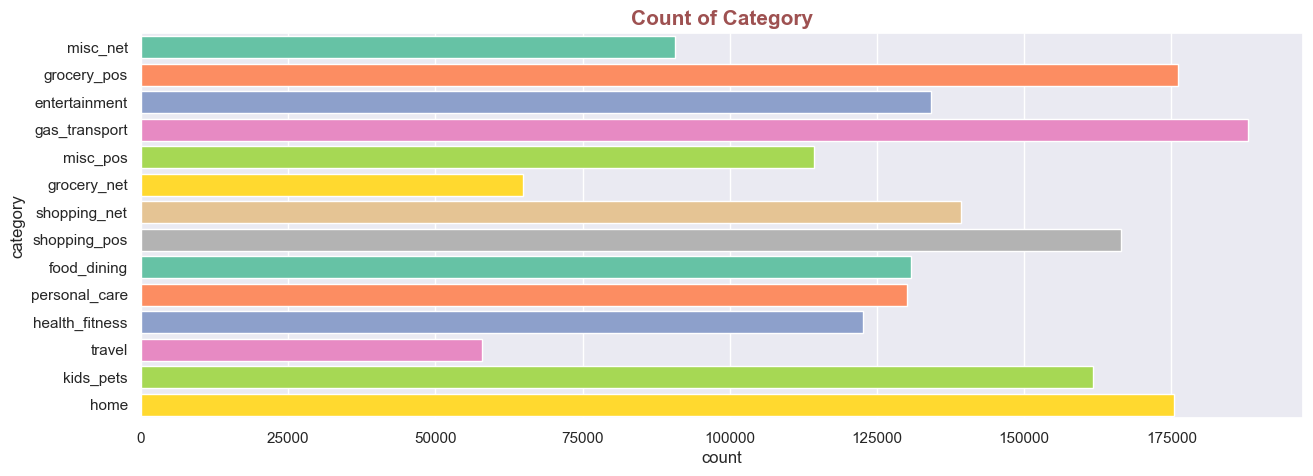

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(y = Dataset['category'],palette = "Set2",saturation = 1).set_title("Count of Category",
    fontdict = {'fontsize': 15,'fontweight': 'bold','color': '#9E5151'})
plt.show()

In [25]:
X = Dataset.drop(['is_fraud'], axis = 1)
Y = Dataset['is_fraud']

### Encoding the categorical Data :

In [26]:
Dataset.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [27]:
Dataset.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
columns = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last','gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

In [30]:
LE = LabelEncoder()

In [31]:
for column in columns:
    X[column] = LE.fit_transform(X[column])

In [32]:
X

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2703186189652095,514,8,4.97,164,18,0,576,532,...,28654,36.0788,-81.1781,3495,372,791,80326,1325376018,36.011293,-82.048315
1,1,630423337322,241,4,107.23,312,161,0,439,619,...,99160,48.8878,-118.2105,149,431,619,227462,1325376044,49.159047,-118.186462
2,2,38859492057661,390,0,220.11,116,386,1,610,474,...,83252,42.1808,-112.2620,4154,308,309,1169030,1325376051,43.150704,-112.154481
3,3,3534093764340240,360,2,45.00,165,468,1,945,84,...,59632,46.2306,-112.1138,1939,330,405,777909,1325376076,47.034331,-112.561071
4,4,375534208663984,297,9,41.96,339,153,1,422,217,...,24433,38.4207,-79.4629,99,116,746,1186866,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,1819546,30560609640617,507,5,43.77,245,323,1,573,471,...,63453,40.4931,-91.8912,519,477,386,1122239,1388534347,39.946837,-91.333331
555715,1819547,3556613125071656,264,7,111.84,180,438,1,583,427,...,77566,29.0393,-95.4401,28739,207,961,235369,1388534349,29.661049,-96.186633
555716,1819548,6011724471098086,496,7,86.88,19,243,0,138,110,...,99323,46.1966,-118.9017,3684,307,669,783898,1388534355,46.658340,-119.715054
555717,1819549,4079773899158,75,13,7.99,120,351,1,711,508,...,83643,44.6255,-116.4493,129,63,383,145946,1388534364,44.470525,-117.080888


In [33]:
from sklearn.preprocessing import MinMaxScaler          #Scaling

In [34]:
Scaler = MinMaxScaler()

In [35]:
X = Scaler.fit_transform(X)

In [36]:
Y = Dataset[['is_fraud']].values

In [37]:
print("X : " , X.shape)
print("Y : " , Y.shape)

X :  (1852394, 21)
Y :  (1852394, 1)


In [38]:
Dataset['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [39]:
X

array([[0.00000000e+00, 5.41453976e-04, 7.42774566e-01, ...,
        0.00000000e+00, 3.50306815e-01, 8.48602977e-01],
       [5.49586436e-07, 1.14176199e-07, 3.48265896e-01, ...,
        4.11663660e-07, 6.21490447e-01, 4.86209244e-01],
       [1.09917287e-06, 7.77171158e-06, 5.63583815e-01, ...,
        5.22496183e-07, 4.97563251e-01, 5.46698015e-01],
       ...,
       [9.99998901e-01, 1.20417608e-03, 7.16763006e-01, ...,
        9.99999699e-01, 5.69911234e-01, 4.70880506e-01],
       [9.99999450e-01, 8.05103937e-07, 1.08381503e-01, ...,
        9.99999842e-01, 5.24785685e-01, 4.97295952e-01],
       [1.00000000e+00, 8.35404572e-04, 1.80635838e-01, ...,
        1.00000000e+00, 3.54407317e-01, 6.98302578e-01]])

In [40]:
Y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

Text(0.5, 1.0, 'Correlation')

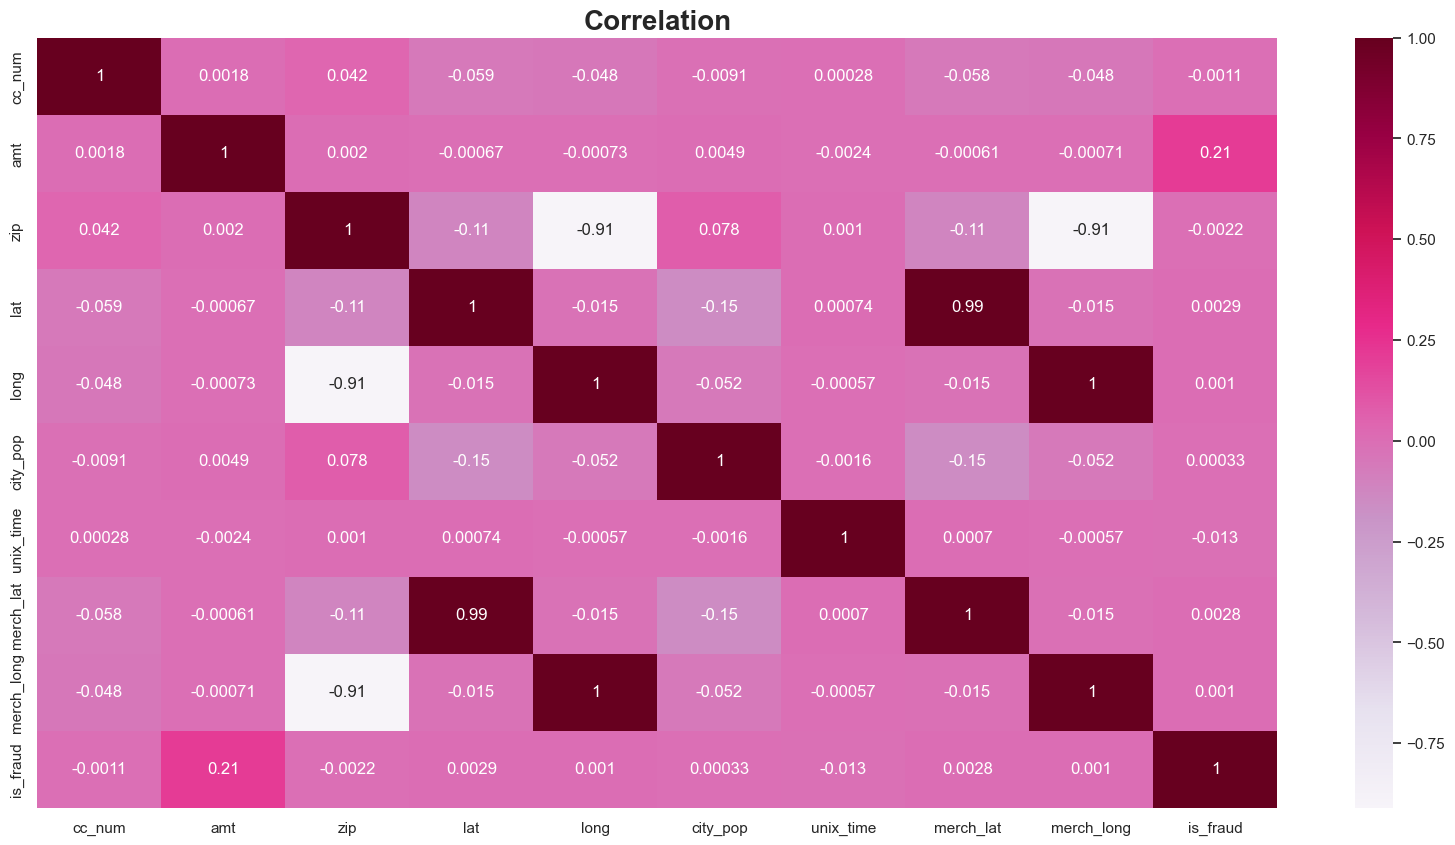

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(Dataset.corr(),annot=True,cmap="PuRd").set_title('Correlation',
    fontdict = {'fontsize': 20,'fontweight': 'bold'})

In [42]:
from imblearn.under_sampling import NearMiss

In [43]:
NM_Sampler = NearMiss()

In [44]:
X_Sampled,Y_Sampled = NM_Sampler.fit_resample(X, Y)

In [45]:
print("Data   : ", X_Sampled.shape)
print("Labels : ", Y_Sampled.shape)

Data   :  (19302, 21)
Labels :  (19302,)


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Sampled, Y_Sampled, test_size = 0.2, random_state = 0)

In [48]:
X_train

array([[3.90722981e-02, 6.95089621e-05, 4.56647399e-01, ...,
        5.74568787e-02, 5.15493532e-01, 6.14510905e-01],
       [4.41416834e-02, 7.04800622e-04, 1.45953757e-01, ...,
        6.55142765e-02, 4.19561476e-01, 8.25577822e-01],
       [8.83304663e-01, 9.30793901e-01, 4.33526012e-02, ...,
        9.12428484e-01, 4.55383549e-01, 9.45601881e-01],
       ...,
       [1.22063147e-02, 7.08456107e-04, 4.11849711e-01, ...,
        1.83256512e-02, 3.76058521e-01, 4.48985688e-01],
       [6.64829216e-02, 7.43585599e-05, 2.09537572e-01, ...,
        9.42779290e-02, 3.33879355e-01, 6.52261603e-01],
       [2.47834355e-01, 7.52729359e-05, 3.12138728e-01, ...,
        2.77404545e-01, 2.76151492e-01, 6.86712383e-01]])

In [49]:
X_test

array([[5.56642576e-01, 7.50888720e-05, 5.20231214e-02, ...,
        5.84068591e-01, 4.92547354e-01, 8.37443195e-01],
       [1.53981479e-01, 1.20411888e-03, 8.67052023e-03, ...,
        1.91603325e-01, 3.12056584e-01, 7.64764213e-01],
       [5.72249182e-01, 9.31615386e-04, 1.53179191e-01, ...,
        6.01879837e-01, 5.78933435e-01, 4.42214424e-01],
       ...,
       [6.10297051e-01, 9.69526572e-07, 3.69942197e-01, ...,
        6.42900411e-01, 2.92116995e-01, 4.83043361e-01],
       [8.40940342e-01, 6.05126605e-06, 4.60982659e-01, ...,
        8.65902526e-01, 4.66955209e-01, 7.55866088e-01],
       [5.17351543e-01, 7.06202554e-04, 6.40173410e-01, ...,
        5.27125706e-01, 5.65005251e-01, 8.01129822e-01]])

In [50]:
Y_train

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [51]:
Y_test

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [52]:
len(X_train)

15441

In [53]:
len(X_test)

3861

In [54]:
len(Y_train)

15441

In [55]:
len(Y_test)

3861

In [56]:
X_train.shape

(15441, 21)

In [57]:
X_test.shape

(3861, 21)

In [58]:
Y_train.shape

(15441,)

In [59]:
Y_test.shape

(3861,)

In [60]:
len(X_train) + len(X_test)

19302

In [61]:
len(Y_train) + len(Y_test)

19302

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
LR_Classifier = LogisticRegression()

In [64]:
LR_Classifier.fit(X_train, Y_train)

LogisticRegression()

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
Train_Pred = LR_Classifier.predict(X_train)
Test_Pred  = LR_Classifier.predict(X_test)

In [74]:
Y_Pred = LR_Classifier.predict(X_test)

In [75]:
CM = confusion_matrix(Y_test,Y_Pred)

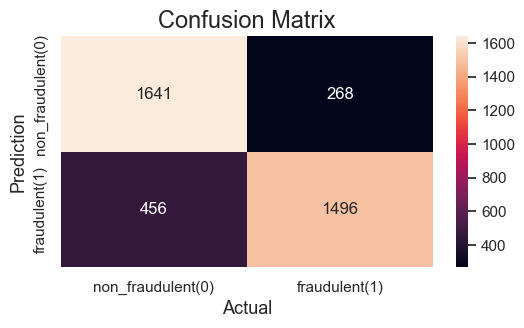

In [76]:
plt.figure(figsize = (6,3))
sns.heatmap(CM,
            annot=True,
            fmt='g',
            xticklabels=['non_fraudulent(0)','fraudulent(1)'],
            yticklabels=['non_fraudulent(0)','fraudulent(1)'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [77]:
1641 + 1496    # Correctly Predicted

3137

In [78]:
456 + 268      # Wrongly Predicted

724

In [79]:
3137 + 724     # Actual Value in Y_test

3861

In [80]:
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

0.8124838124838125
